In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('sealevel.csv') #reading the file
df.drop(columns=['TotalWeightedObservations','GMSL_noGIA','StdDevGMSL_noGIA','SmoothedGSML_noGIA','GMSL_GIA','StdDevGMSL_GIA',\
                 'SmoothedGSML_GIA'],inplace=True) #dropping unnecesary columns
df.columns =['year','level_rise_mm'] # renaming columns

df['level_rise_mm'] = df['level_rise_mm'] + 38.57 # manipulating datapoints to start from 0 

df.head(5) # printing the 5 first values of sea level rise

year  level_rise_mm
0  1993           0.00
1  1993          -0.54
2  1993          -0.01
3  1993           0.23
4  1993           1.36

In [4]:
X = np.linspace(0,1048, num=1048).reshape(-1, 1) # making a feature vector of all the measurements, by number
y = df['level_rise_mm'].to_numpy() # vector for lables, sea level change in millimeters compared to first value
years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
year_points = [0, 37, 74, 111, 147, 184, 221, 258, 295, 332, 368, 405, 442, 479, 515, 552, 588, 625, 662, 699, 736, 773, 809, 846, 883, 920, 957, 994, 1030, 1067, 1104, 1141, 1178]


In [5]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.5, random_state=42) # splitting dataset to training data and remaining

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)# splitting remaining dataset to validation data and test data


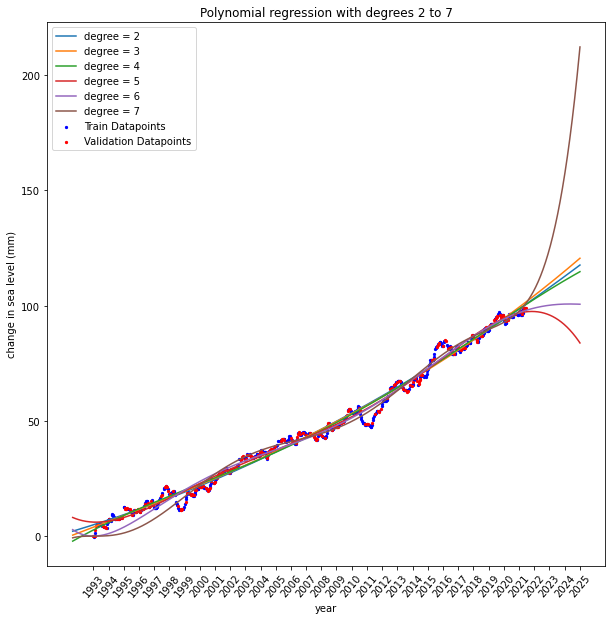

In [21]:
degrees = [2, 3, 4, 5, 6,7] #degrees to test polynomial degression on
tr_errors, val_errors = [], [] #saving all the errors

plt.figure(figsize=(10, 10)) #creating figure


for i, degree in enumerate(degrees):# looping different degrees to fit polynomial regression models
    lin_regr = LinearRegression(fit_intercept=False)
    poly = PolynomialFeatures(degree=degree)

    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)

    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train)

    X_val_poly = poly.fit_transform(X_val)

    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)

    tr_errors.append(tr_error)
    val_errors.append(val_error)

    X_fit = np.linspace(-50, 1178, 1250)

    plt.plot(X_fit, lin_regr.predict(poly.transform(X_fit.reshape(-1, 1))), label=f'degree = {degree}') # plotting the model
    
    plt.xlabel('year')
    plt.ylabel('change in sea level (mm)')
    

plt.scatter(X_train, y_train, color="b", s = 5, label="Train Datapoints")
plt.scatter(X_val, y_val, color="r", s = 5, label="Validation Datapoints")
plt.legend(loc="best")
plt.title('Polynomial regression with degrees 2 to 7')
plt.xticks(year_points, years, rotation=50)

plt.show()


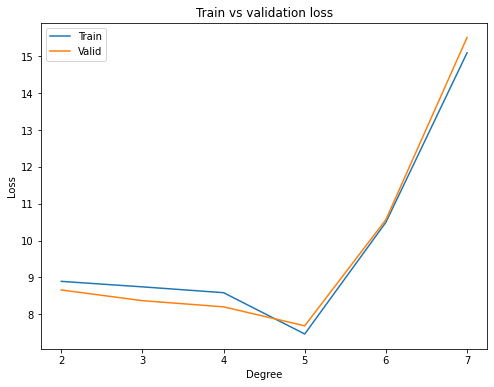

In [22]:
plt.figure(figsize=(8, 6))

# plotting training and validation errors for different degrees
plt.plot(degrees, tr_errors, label = 'Train')
plt.plot(degrees, val_errors,label = 'Valid')
plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

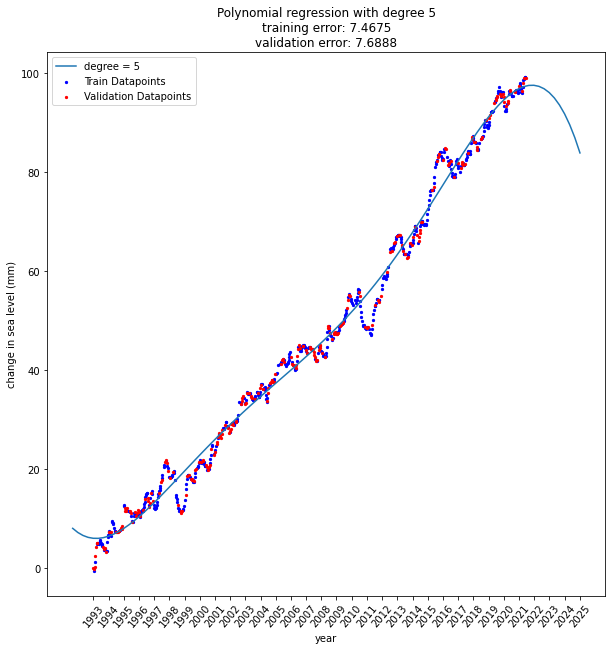

In [23]:
plt.figure(figsize=(10, 10))


# plotting polynomial regression model with degree 5

lin_regr = LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(degree=5)

X_train_poly = poly.fit_transform(X_train)
lin_regr.fit(X_train_poly, y_train)

y_pred_train = lin_regr.predict(X_train_poly)
tr_error = mean_squared_error(y_train, y_pred_train)

X_val_poly = poly.fit_transform(X_val)

y_pred_val = lin_regr.predict(X_val_poly)
val_error = mean_squared_error(y_val, y_pred_val)

X_fit = np.linspace(-50, 1178, 100)

plt.plot(X_fit, lin_regr.predict(poly.transform(X_fit.reshape(-1, 1))), label=f'degree = 5')
    
plt.xlabel('year')
plt.ylabel('change in sea level (mm)')
    
plt.scatter(X_train, y_train, color="b", s = 5, label="Train Datapoints")
plt.scatter(X_val, y_val, color="r", s = 5, label="Validation Datapoints")
plt.legend(loc="best")
plt.title(f'Polynomial regression with degree 5\ntraining error: {tr_error:.5}\nvalidation error: {val_error:.5}')
plt.xticks(year_points, years, rotation=50)
plt.show()

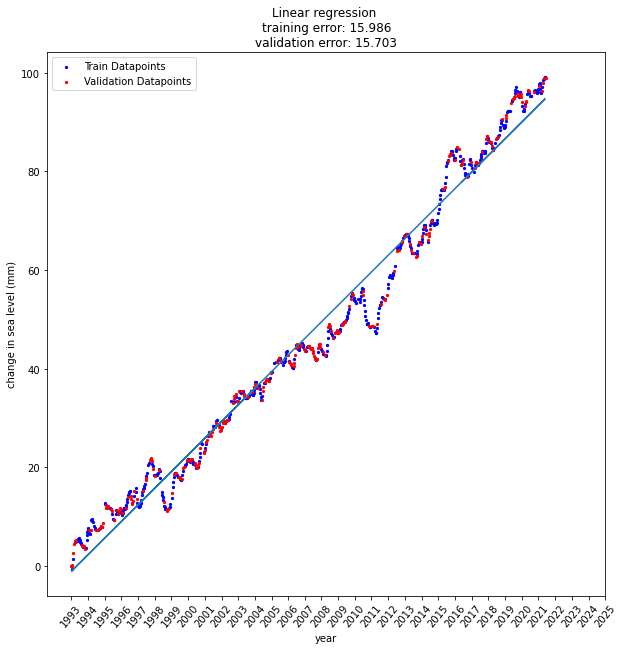

In [24]:
#applying linear regression
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)

y_pred_train = lin_regr.predict(X_train)
tr_error = mean_squared_error(y_train, y_pred_train)

y_pred_val = lin_regr.predict(X_val)
val_error = mean_squared_error(y_val, y_pred_val)
#plotting the model
plt.figure(figsize=(10, 10))
plt.plot(X_train, y_pred_train)
plt.scatter(X_train, y_train, color="b", s = 5, label="Train Datapoints")
plt.scatter(X_val, y_val, color="r", s = 5, label="Validation Datapoints")

plt.legend(loc="best")
plt.title(f'Linear regression \ntraining error: {tr_error:.5}\nvalidation error: {val_error:.5}')
plt.xticks(year_points, years, rotation=50)

plt.xlabel('year')
plt.ylabel('change in sea level (mm)')

plt.show()

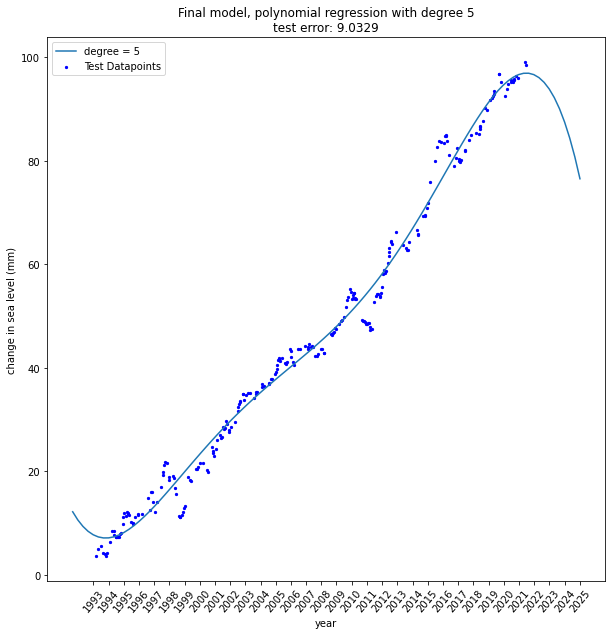

In [28]:
#plotting the final model (polynomial in degree 5) with test data
plt.figure(figsize=(10, 10))


# plotting polynomial regression model with degree 5

lin_regr = LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(degree=5)

X_test_poly = poly.fit_transform(X_test)
lin_regr.fit(X_test_poly, y_test)

y_pred_test = lin_regr.predict(X_test_poly)
test_error = mean_squared_error(y_test, y_pred_test)


X_fit = np.linspace(-50, 1178, 100)

plt.plot(X_fit, lin_regr.predict(poly.transform(X_fit.reshape(-1, 1))), label=f'degree = 5')
    
plt.xlabel('year')
plt.ylabel('change in sea level (mm)')
    
plt.scatter(X_test, y_test, color="b", s = 5, label="Test Datapoints")

plt.legend(loc="best")
plt.title(f'Final model, polynomial regression with degree 5\ntest error: {test_error:.5}')
plt.xticks(year_points, years, rotation=50)
plt.show()
